In [279]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [280]:
path = 'D:\\uni\\2курс\ПЗМН\ML_labs\lab2\data.csv'
df = pd.read_csv(path)
df.head()

,# New York (Central Park),New York January Average Temperature
0,# Units: Degrees Fahrenheit,NaN
1,# Missing: -99,NaN
2,Date,Value
3,189501,27.6
4,189601,27


In [281]:
df = df.drop(df.head(3).index)
df = df.reset_index(drop=True)

In [282]:
df.head()

,# New York (Central Park),New York January Average Temperature
0,189501,27.6
1,189601,27
2,189701,27.8
3,189801,32.4
4,189901,28.4


In [283]:
df.columns

Index(['#  New York (Central Park)', ' New York January Average Temperature'], dtype='object')

In [284]:
df = df.rename(columns={
    "#  New York (Central Park)": "Year",
    " New York January Average Temperature": "Temperature"
})

In [285]:
df.head()

,Year,Temperature
0,189501,27.6
1,189601,27
2,189701,27.8
3,189801,32.4
4,189901,28.4


In [286]:
df.tail()

,Year,Temperature
125,202001,39.2
126,202101,34.8
127,202201,30.4
128,202301,43.5
129,202401,37


In [287]:
df.isnull().sum()

Year           0
Temperature    0
dtype: int64

In [288]:
df.isna().sum()

Year           0
Temperature    0
dtype: int64

In [289]:
df.Year = df.Year.astype('int')
df.Temperature = df.Temperature.astype('float')

In [290]:
df["Year"] = df.Year.floordiv(100)

In [291]:
df.head()

,Year,Temperature
0,1895,27.6
1,1896,27.0
2,1897,27.8
3,1898,32.4
4,1899,28.4


In [292]:
df.tail()

,Year,Temperature
125,2020,39.2
126,2021,34.8
127,2022,30.4
128,2023,43.5
129,2024,37.0


In [293]:
df.Temperature.describe()

count    130.000000
mean      31.298462
std        4.665991
min       19.900000
25%       28.100000
50%       31.200000
75%       34.275000
max       43.500000
Name: Temperature, dtype: float64

In [294]:
df.isna().sum()

Year           0
Temperature    0
dtype: int64

In [295]:
df_mod = df.iloc[:-4].copy()
df_mod.tail()

,Year,Temperature
121,2016,34.5
122,2017,38.1
123,2018,31.8
124,2019,32.6
125,2020,39.2


In [296]:
df_test = df.iloc[-4:].copy()
df_test = df_test.reset_index(drop=True)
df_test

,Year,Temperature
0,2021,34.8
1,2022,30.4
2,2023,43.5
3,2024,37.0


In [297]:
df_test.Year[0]

np.int64(2021)

In [298]:
lin_reg = stats.linregress(df_mod.Year, df_mod.Temperature)

In [299]:
slope = lin_reg.slope
print(slope)

0.03208668916385451


In [300]:
intcpt = lin_reg.intercept
print(intcpt)

-31.673979752530915


In [301]:
n = len(df_test.index)
df_test["Predicted_Temp"] = slope * df_test.Year + intcpt
df_test["Temp_Difference"] = np.abs(df_test.Temperature-df_test.Predicted_Temp)
df_test

,Year,Temperature,Predicted_Temp,Temp_Difference
0,2021,34.8,33.173219,1.626781
1,2022,30.4,33.205306,2.805306
2,2023,43.5,33.237392,10.262608
3,2024,37.0,33.269479,3.730521


In [302]:
MSE = np.round(np.square(np.subtract(df_test.Temperature, df_test.Predicted_Temp)).mean(), 3)
print(MSE)

32.439


In [303]:
df_bfr1895 = pd.DataFrame({'Year': range(1885, 1895)})
df_bfr1895["Predicted_Temp"] = slope * df_bfr1895.Year + intcpt
df_bfr1895

,Year,Predicted_Temp
0,1885,28.809429
1,1886,28.841516
2,1887,28.873603
3,1888,28.905689
4,1889,28.937776
5,1890,28.969863
6,1891,29.001949
7,1892,29.034036
8,1893,29.066123
9,1894,29.098210


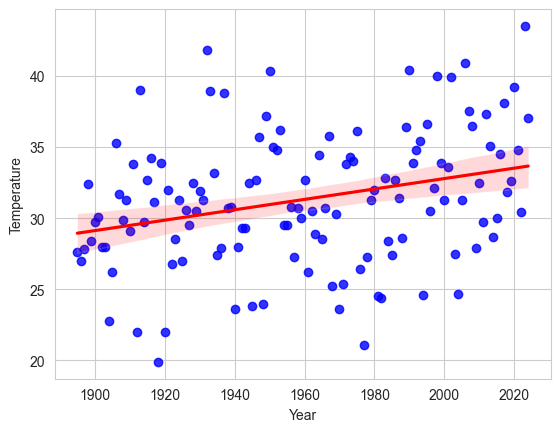

In [304]:
sns.set_style("whitegrid")
axes = sns.regplot(x=df.Year, y=df.Temperature, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

(10.0, 90.0)

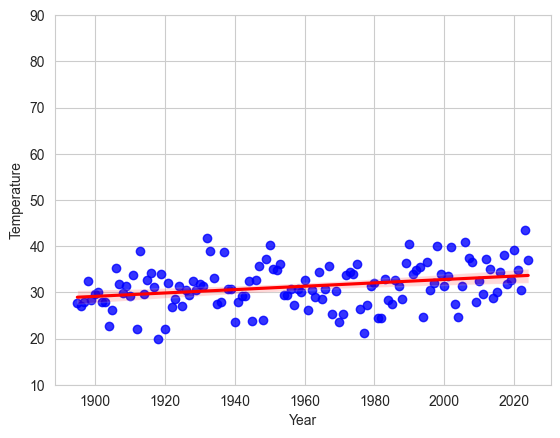

In [305]:
sns.regplot(x=df.Year, y=df.Temperature, scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set_ylim(10, 90)

(10.0, 70.0)

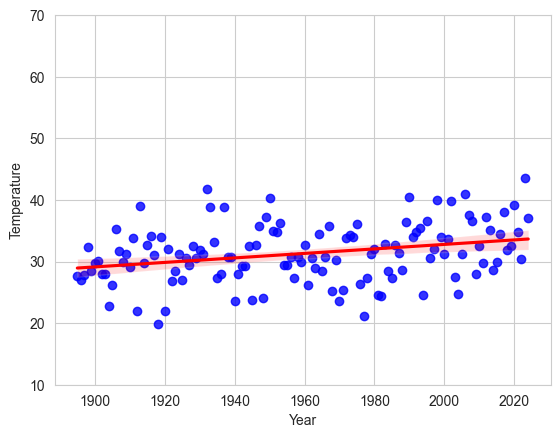

In [306]:
sns.regplot(x=df.Year, y=df.Temperature, scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set_ylim(10, 70)

(25.0, 40.0)

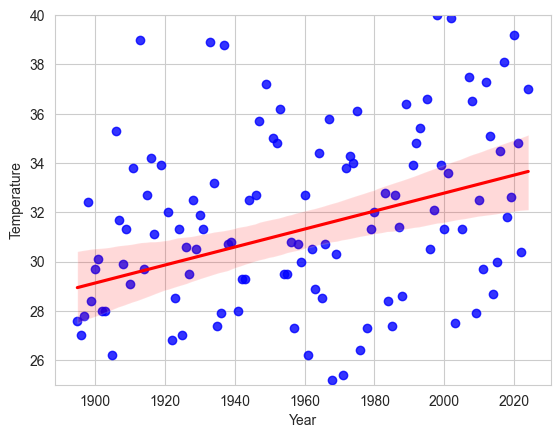

In [307]:
sns.regplot(x=df.Year, y=df.Temperature, scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set_ylim(25, 40)